In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import spiir.io

In [3]:
data_dir = Path("../data/")
coinc_xml = data_dir / "misc/H1L1V1_1344284404_273_202.xml"

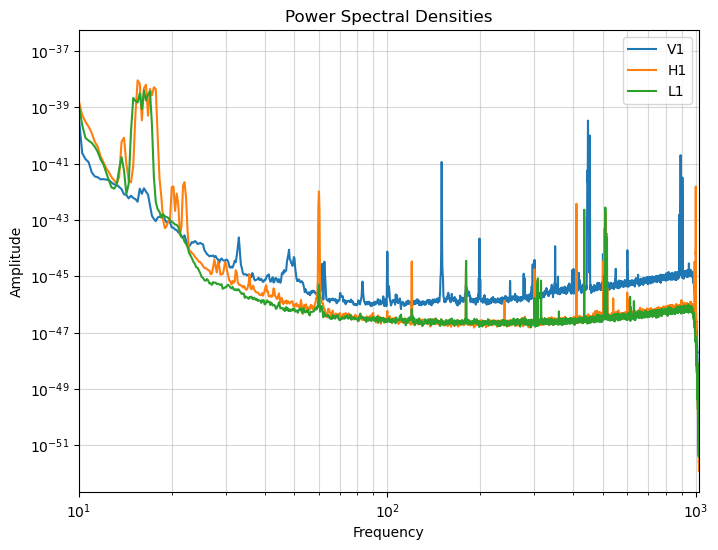

In [4]:
psds = spiir.io.ligolw.array.load_psd_series_from_xml(coinc_xml)
psds = pd.concat(psds, axis=1)

fig, ax = plt.subplots(figsize=(8, 6))
psds.plot(title="Power Spectral Densities", ax=ax, logx=True, logy=True)
ax.set(xlim=(10, psds.index.max()), xlabel="Frequency", ylabel="Amplitude")
ax.grid(which="both", axis="both", alpha=0.5)
fig.show()

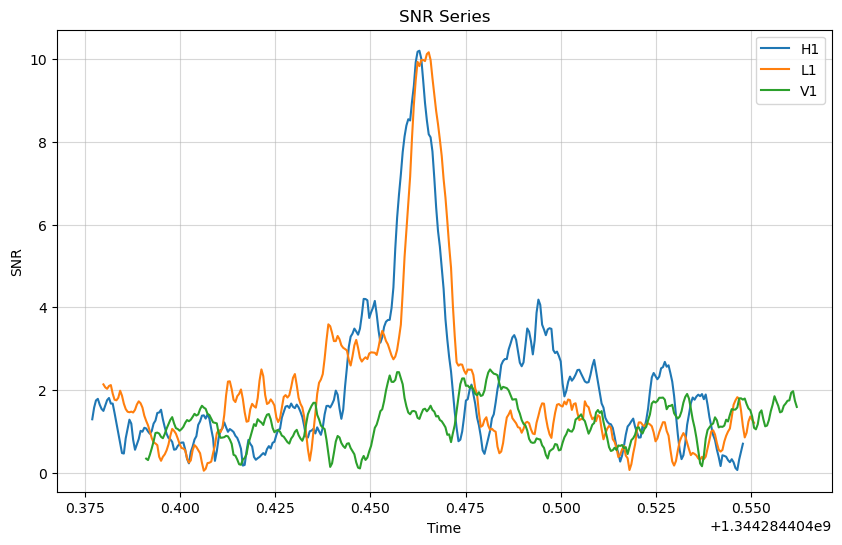

In [5]:
snrs = spiir.io.ligolw.array.load_snr_series_from_xml(coinc_xml)
snrs = pd.concat(snrs, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
network_snr = snrs.apply(lambda snr: np.sqrt(np.real(snr)**2 + np.imag(snr)**2), axis=0)
network_snr.plot(title="SNR Series", xlabel="Time", ylabel="SNR", ax=ax);
ax.grid(which="both", axis="both", alpha=0.5)
fig.show()

In [6]:
data = spiir.io.ligolw.load_coinc_xml(coinc_xml)
for key in data:
    for name in data[key]:
        print(f"{key}: {name} ({type(data[key][name])})")

tables: process (<class 'pandas.core.frame.DataFrame'>)
tables: process_params (<class 'pandas.core.frame.DataFrame'>)
tables: sngl_inspiral (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_definer (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_event (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_event_map (<class 'pandas.core.frame.DataFrame'>)
tables: time_slide (<class 'pandas.core.frame.DataFrame'>)
tables: coinc_inspiral (<class 'pandas.core.frame.DataFrame'>)
tables: postcoh (<class 'pandas.core.frame.DataFrame'>)
psds: V1 (<class 'pandas.core.series.Series'>)
psds: H1 (<class 'pandas.core.series.Series'>)
psds: L1 (<class 'pandas.core.series.Series'>)
snrs: H1 (<class 'pandas.core.series.Series'>)
snrs: L1 (<class 'pandas.core.series.Series'>)
snrs: V1 (<class 'pandas.core.series.Series'>)


In [7]:
data = spiir.io.ligolw.load_coinc_xml(coinc_xml)
data.keys()

dict_keys(['tables', 'psds', 'snrs'])

In [8]:
p_astro = {"BBH": 0.6, "BNS": 0.05, "NSBH": 0.0, "Terrestrial": 0.35}
spiir.io.ligolw.save_coinc_xml("test.xml", **data, p_astro=p_astro)

In [9]:
data = spiir.io.ligolw.load_coinc_xml("test.xml")
data.keys()

dict_keys(['tables', 'psds', 'snrs', 'p_astro'])

In [10]:
data["p_astro"]  # LIGO_LW params in xml file require lower case keys

{'bbh': 0.6, 'bns': 0.05, 'nsbh': 0.0, 'terrestrial': 0.35}

In [11]:
# xmldoc = spiir.io.ligolw.load_ligolw_xmldoc("test.xml", nullable=False)
# arrays = spiir.io.ligolw.get_arrays_from_xmldoc(xmldoc)
# tables = spiir.io.ligolw.get_tables_from_xmldoc(xmldoc)
# psds = spiir.io.ligolw.array.build_psd_series_from_xmldoc(xmldoc)
# snrs = spiir.io.ligolw.array.build_snr_series_from_xmldoc(xmldoc)
# data = {**tables, "psds": psds, "snrs": snrs}

In [12]:
bank_paths = list(data_dir.glob("pipeline/artifacts/banks/*.xml.gz"))[0]
bank_data = spiir.io.ligolw.load_tables_from_xmls(bank_paths)
for key, table in bank_data.items():
    display(key, table.head())

'sngl_inspiral'

,Gamma0,Gamma1,Gamma2,Gamma3,Gamma4,Gamma5,Gamma6,Gamma7,Gamma8,Gamma9,...,spin2x,spin2y,spin2z,tau0,tau2,tau3,tau4,tau5,template_duration,ttotal
0,530993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037529,501.571991,0.0,5.190576,0.0,0.0,508.868071,0.0
1,525795.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.023592,501.269989,0.0,5.189121,0.0,0.0,508.572942,0.0
2,530235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001432,498.897919,0.0,5.179618,0.0,0.0,506.094779,0.0
3,529825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000149,497.950836,0.0,5.175787,0.0,0.0,505.314224,0.0
4,535461.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.048340,496.121185,0.0,5.167997,0.0,0.0,503.572166,0.0


In [13]:
detrsp_map_path = list(data_dir.glob("pipeline/artifacts/*_detrsp_map.xml.gz"))[0]
detrsp_map = spiir.io.ligolw.load_arrays_from_xmls(detrsp_map_path)
for key, array in detrsp_map.items():
    print(f"{key}: {array.shape}")

U_map_gps_0: (12288, 9)
diff_map_gps_0: (12288, 9)
U_map_gps_1800: (12288, 9)
diff_map_gps_1800: (12288, 9)
U_map_gps_3600: (12288, 9)
diff_map_gps_3600: (12288, 9)
U_map_gps_5400: (12288, 9)
diff_map_gps_5400: (12288, 9)
U_map_gps_7200: (12288, 9)
diff_map_gps_7200: (12288, 9)
U_map_gps_9000: (12288, 9)
diff_map_gps_9000: (12288, 9)
U_map_gps_10800: (12288, 9)
diff_map_gps_10800: (12288, 9)
U_map_gps_12600: (12288, 9)
diff_map_gps_12600: (12288, 9)
U_map_gps_14400: (12288, 9)
diff_map_gps_14400: (12288, 9)
U_map_gps_16200: (12288, 9)
diff_map_gps_16200: (12288, 9)
U_map_gps_18000: (12288, 9)
diff_map_gps_18000: (12288, 9)
U_map_gps_19800: (12288, 9)
diff_map_gps_19800: (12288, 9)
U_map_gps_21600: (12288, 9)
diff_map_gps_21600: (12288, 9)
U_map_gps_23400: (12288, 9)
diff_map_gps_23400: (12288, 9)
U_map_gps_25200: (12288, 9)
diff_map_gps_25200: (12288, 9)
U_map_gps_27000: (12288, 9)
diff_map_gps_27000: (12288, 9)
U_map_gps_28800: (12288, 9)
diff_map_gps_28800: (12288, 9)
U_map_gps_30600

In [14]:
prob_map_path = list(data_dir.glob("pipeline/artifacts/*_prob_map.xml.gz"))[0]
prob_map = spiir.io.ligolw.load_arrays_from_xmls(prob_map_path)
for key, array in prob_map.items():
    print(f"{key}: {array.shape}")

Det_map_gps_0: (12288, 1)
Det_map_gps_1800: (12288, 1)
Det_map_gps_3600: (12288, 1)
Det_map_gps_5400: (12288, 1)
Det_map_gps_7200: (12288, 1)
Det_map_gps_9000: (12288, 1)
Det_map_gps_10800: (12288, 1)
Det_map_gps_12600: (12288, 1)
Det_map_gps_14400: (12288, 1)
Det_map_gps_16200: (12288, 1)
Det_map_gps_18000: (12288, 1)
Det_map_gps_19800: (12288, 1)
Det_map_gps_21600: (12288, 1)
Det_map_gps_23400: (12288, 1)
Det_map_gps_25200: (12288, 1)
Det_map_gps_27000: (12288, 1)
Det_map_gps_28800: (12288, 1)
Det_map_gps_30600: (12288, 1)
Det_map_gps_32400: (12288, 1)
Det_map_gps_34200: (12288, 1)
Det_map_gps_36000: (12288, 1)
Det_map_gps_37800: (12288, 1)
Det_map_gps_39600: (12288, 1)
Det_map_gps_41400: (12288, 1)
Det_map_gps_43200: (12288, 1)
Det_map_gps_45000: (12288, 1)
Det_map_gps_46800: (12288, 1)
Det_map_gps_48600: (12288, 1)
Det_map_gps_50400: (12288, 1)
Det_map_gps_52200: (12288, 1)
Det_map_gps_54000: (12288, 1)
Det_map_gps_55800: (12288, 1)
Det_map_gps_57600: (12288, 1)
Det_map_gps_59400: 

In [15]:
segments_path = list(data_dir.glob("pipeline/HL_000/*_SEGMENTS_*.xml.gz"))[0]
segments_data = spiir.io.ligolw.load_tables_from_xmls(segments_path)
for key, table in segments_data.items():
    display(key, table.head())

'process'

,comment,cvs_entry_time,cvs_repository,domain,end_time,ifos,is_online,jobid,node,process_id,program,start_time,unix_procid,username,version
0,None,None,None,None,1338924620,None,0,0,john76,0,gstlal_inspiral_postcohspiir_online,1338898628,35223,dtang,None


'process_params'

,param,process_id,program,type,value


'segment_definer'

,comment,ifos,name,process_id,segment_def_id,version
0,SPIIR postcoh snapshot,H1,postcohprocessed,0,0,None
1,SPIIR postcoh snapshot,L1,postcohprocessed,0,1,None


'segment_summary'

,comment,end_time,end_time_ns,process_id,segment_def_id,segment_sum_id,start_time,start_time_ns


'segment'

,end_time,end_time_ns,process_id,segment_def_id,segment_id,start_time,start_time_ns
0,1257993789,0,0,0,0,1257992907,0
1,1257992968,0,0,1,1,1257992907,0
2,1257995313,0,0,1,2,1257992969,0
3,1257995398,0,0,0,3,1257993799,0
4,1257995488,0,0,1,4,1257995316,0


In [16]:
psd_path = list(data_dir.glob("pipeline/artifacts/*-REF_PSD-*.xml.gz"))[0]
psd_data = spiir.io.ligolw.array.load_psd_series_from_xml(psd_path)
for key, series in psd_data.items():
    display(series.head())

frequency
0.0000    0.0
0.0625    0.0
0.1250    0.0
0.1875    0.0
0.2500    0.0
Name: V1, dtype: float64

frequency
0.0000    2.272249e-50
0.0625    6.076652e-51
0.1250    2.224925e-51
0.1875    2.741919e-51
0.2500    2.452500e-51
Name: H1, dtype: float64

frequency
0.0000    2.407411e-47
0.0625    5.222415e-47
0.1250    7.577322e-47
0.1875    8.848543e-47
0.2500    5.362057e-47
Name: L1, dtype: float64

In [17]:
coinc_paths = list(data_dir.glob("pipeline/coinc/*.xml"))
coincs_data = spiir.io.ligolw.load_tables_from_xmls(coinc_paths, verbose=True)
for key, table in coincs_data.items():
    display(key, table.head())

Loading None tables from LIGOLW XML files: 100%|██████████| 11/11 [00:00<00:00, 16.80it/s]


'process'

,comment,cvs_entry_time,cvs_repository,domain,end_time,ifos,is_online,jobid,node,process_id,program,start_time,unix_procid,username,version
0,None,None,None,None,None,"H1,L1",0,0,john76,10,gstlal_inspiral_postcohspiir_online,1338908385,35223,dtang,None
1,None,None,None,None,None,"H1,L1",0,0,john76,8,gstlal_inspiral_postcohspiir_online,1338904308,35223,dtang,None
2,None,None,None,None,None,"H1,L1",0,0,john76,3,gstlal_inspiral_postcohspiir_online,1338899146,35223,dtang,None
3,None,None,None,None,None,"H1,L1",0,0,john76,7,gstlal_inspiral_postcohspiir_online,1338903313,35223,dtang,None
4,None,None,None,None,None,"H1,L1",0,0,john108,1,gstlal_inspiral_postcohspiir_online,1338898648,12221,dtang,None


'process_params'

,param,process_id,program,type,value
0,--psd-fft-length,10,gstlal_inspiral_postcohspiir_online,int_8s,16
1,--cohfar-accumbackground-output-prefix,10,gstlal_inspiral_postcohspiir_online,lstring,/fred/oz016/dtang/analysis/pastro/injection/bb...
2,--cohfar-accumbackground-output-prefix,10,gstlal_inspiral_postcohspiir_online,lstring,/fred/oz016/dtang/analysis/pastro/injection/bb...
3,--cohfar-accumbackground-output-prefix,10,gstlal_inspiral_postcohspiir_online,lstring,/fred/oz016/dtang/analysis/pastro/injection/bb...
4,--cohfar-accumbackground-output-prefix,10,gstlal_inspiral_postcohspiir_online,lstring,/fred/oz016/dtang/analysis/pastro/injection/bb...


'sngl_inspiral'

,Gamma0,Gamma1,bank_chisq,bank_chisq_dof,chisq,chisq_dof,coa_phase,eff_distance,end_time,end_time_ns,...,cont_chisq_dof,rsqveto_duration,Gamma2,Gamma3,Gamma4,Gamma5,Gamma6,Gamma7,Gamma8,Gamma9
0,0.0,0.0,0.0,0,0.760578,4,-0.476423,771.628296,1258035632,624023437,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0,1.119717,4,-2.444337,770.818054,1258035632,621093749,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0.940697,4,-0.682943,702.095215,1258020280,743164063,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0.859416,4,2.443048,702.435059,1258020280,747558594,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0,1.028433,4,-2.232963,459.234741,1257997458,489746094,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'coinc_definer'

,coinc_def_id,description,search,search_coinc_type
0,3,sngl_inspiral<-->sngl_inspiral coincidences,inspiral,0
1,3,sngl_inspiral<-->sngl_inspiral coincidences,inspiral,0
2,3,sngl_inspiral<-->sngl_inspiral coincidences,inspiral,0
3,3,sngl_inspiral<-->sngl_inspiral coincidences,inspiral,0
4,3,sngl_inspiral<-->sngl_inspiral coincidences,inspiral,0


'coinc_event'

,coinc_def_id,coinc_event_id,instruments,likelihood,nevents,process_id,time_slide_id
0,3,1,"H1,L1",0.0,2,10,6
1,3,1,"H1,L1",0.0,2,8,6
2,3,1,"H1,L1",0.0,2,3,6
3,3,1,"H1,L1",0.0,2,7,6
4,3,1,"H1,L1",0.0,2,1,6


'coinc_event_map'

,coinc_event_id,event_id,table_name
0,1,0,sngl_inspiral
1,1,1,sngl_inspiral
2,1,0,sngl_inspiral
3,1,1,sngl_inspiral
4,1,0,sngl_inspiral


'time_slide'

,instrument,offset,process_id,time_slide_id
0,H1,0.0,10,6
1,L1,0.0,10,6
2,H1,0.0,8,6
3,L1,0.0,8,6
4,H1,0.0,3,6


'coinc_inspiral'

,coinc_event_id,combined_far,end_time,end_time_ns,false_alarm_rate,ifos,mass,mchirp,minimum_duration,snr
0,1,2.175436e-06,1258035632,624023437,0.0,"H1,L1",9.570133,3.862753,55.671689,9.466113
1,1,9.704735e-08,1258020280,747558594,0.0,"H1,L1",8.633914,3.649171,61.865397,10.202198
2,1,2.721755e-06,1257997458,489746094,0.0,"H1,L1",6.689728,2.895393,89.561323,9.965616
3,1,5.301681e-05,1258013401,975097656,0.0,"H1,L1",8.168948,3.477450,66.351740,8.854109
4,1,4.602771e-28,1258021189,913085937,0.0,"H1,L1",11.351046,4.395201,46.079363,14.597291


'postcoh'

,bankid,chisq_H1,chisq_L1,chisq_V1,cmbchisq,coaphase_H1,coaphase_L1,coaphase_V1,cohsnr,dec,...,end_time_sngl_K1,end_time_ns_sngl_K1,snglsnr_K1,coaphase_K1,chisq_K1,far_sngl_K1,far_1w_sngl_K1,far_1d_sngl_K1,far_2h_sngl_K1,deff_K1
0,387,0.760578,1.119717,0.0,0.940148,-0.476423,-2.444337,0.0,9.466113,-76.813533,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,386,0.940697,0.859416,0.0,0.900056,-0.682943,2.443048,0.0,10.202198,15.713861,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,384,1.028433,1.307321,0.0,1.167877,-2.232963,1.617493,0.0,9.965616,-15.713861,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,385,0.850252,0.961187,0.0,0.905720,1.132371,-1.813109,0.0,8.854109,5.979157,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,389,0.623653,1.035281,0.0,0.829467,-0.328511,2.503099,0.0,14.597291,-40.228185,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
marginalized_stats_paths = list(data_dir.glob("pipeline/HL_000/*_marginalized_stats_*.xml.gz"))[0]  # 1d, 2h, 1w
marginalized_stats_tables = spiir.io.ligolw.load_tables_from_xmls(marginalized_stats_paths, verbose=True)
marginalized_stats_arrays = spiir.io.ligolw.load_arrays_from_xmls(marginalized_stats_paths, verbose=True)

for key, table in marginalized_stats_tables.items():
    display(key, table.head())

for key, array in marginalized_stats_arrays.items():
    print(f"{key}: {array.shape}")

'rank_rate'

,cmin,cmax,nbin
0,-30.0,0.0,300


background_feature:H1_lgsnr_rate: (300,)
background_feature:H1_lgchisq_rate: (300,)
background_feature:H1_lgsnr_lgchisq_rate: (300, 300)
background_feature:H1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:H1_rank_map: (300, 300)
background_rank:H1_rank_rate: (300,)
background_rank:H1_rank_pdf: (300,)
background_rank:H1_rank_fap: (300,)
background_feature:L1_lgsnr_rate: (300,)
background_feature:L1_lgchisq_rate: (300,)
background_feature:L1_lgsnr_lgchisq_rate: (300, 300)
background_feature:L1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:L1_rank_map: (300, 300)
background_rank:L1_rank_rate: (300,)
background_rank:L1_rank_pdf: (300,)
background_rank:L1_rank_fap: (300,)
background_feature:H1L1_lgsnr_rate: (300,)
background_feature:H1L1_lgchisq_rate: (300,)
background_feature:H1L1_lgsnr_lgchisq_rate: (300, 300)
background_feature:H1L1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:H1L1_rank_map: (300, 300)
background_rank:H1L1_rank_rate: (300,)
background_rank:H1L1_rank_pdf: (300,)
backgrou

In [19]:
bank_stats_path = list(data_dir.glob("pipeline/HL_000/bank*_stats_*.xml.gz"))[0]
bank_stats_tables = spiir.io.ligolw.load_tables_from_xmls(bank_stats_path, verbose=True)
bank_stats_arrays = spiir.io.ligolw.load_arrays_from_xmls(bank_stats_path, verbose=True)

for key, table in bank_stats_tables.items():
    display(key, table.head())

for key, array in bank_stats_arrays.items():
    print(f"{key}: {array.shape}")

'rank_rate'

,cmin,cmax,nbin
0,-30.0,0.0,300


background_feature:H1_lgsnr_rate: (300,)
background_feature:H1_lgchisq_rate: (300,)
background_feature:H1_lgsnr_lgchisq_rate: (300, 300)
background_feature:H1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:H1_rank_map: (300, 300)
background_rank:H1_rank_rate: (300,)
background_rank:H1_rank_pdf: (300,)
background_rank:H1_rank_fap: (300,)
background_feature:L1_lgsnr_rate: (300,)
background_feature:L1_lgchisq_rate: (300,)
background_feature:L1_lgsnr_lgchisq_rate: (300, 300)
background_feature:L1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:L1_rank_map: (300, 300)
background_rank:L1_rank_rate: (300,)
background_rank:L1_rank_pdf: (300,)
background_rank:L1_rank_fap: (300,)
background_feature:H1L1_lgsnr_rate: (300,)
background_feature:H1L1_lgchisq_rate: (300,)
background_feature:H1L1_lgsnr_lgchisq_rate: (300, 300)
background_feature:H1L1_lgsnr_lgchisq_pdf: (300, 300)
background_rank:H1L1_rank_map: (300, 300)
background_rank:H1L1_rank_rate: (300,)
background_rank:H1L1_rank_pdf: (300,)
backgrou

In [20]:
zerolags_path = list(data_dir.glob("pipeline/HL_000/*_zerolag_*.xml.gz"))[0]
zerolags_tables = spiir.io.ligolw.load_tables_from_xmls(zerolags_path, verbose=True)

for key, table in zerolags_tables.items():
    display(key, table.head())

'postcoh'

,bankid,chisq_H1,chisq_L1,chisq_V1,cmbchisq,coaphase_H1,coaphase_L1,coaphase_V1,cohsnr,dec,...,end_time_sngl_K1,end_time_ns_sngl_K1,snglsnr_K1,coaphase_K1,chisq_K1,far_sngl_K1,far_1w_sngl_K1,far_1d_sngl_K1,far_2h_sngl_K1,deff_K1
0,384,2.346264,1.395149,0.0,1.870706,-1.558328,-2.089965,0.0,8.725268,-23.317957,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,386,2.538136,1.742194,0.0,2.140165,-0.859831,-0.727210,0.0,10.205485,-34.228866,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,386,3.727758,2.066510,0.0,2.897134,0.335586,0.490680,0.0,11.251966,15.713861,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,385,3.917788,2.538763,0.0,3.228276,1.094356,2.412566,0.0,11.467675,-34.228866,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,386,3.297307,2.191614,0.0,2.744461,0.758153,-0.798611,0.0,11.858354,-23.317957,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
